In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno


In [6]:

# Direct link to the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/MUHAMMED13690/IPL-Auction-Analysis-2023/main/IPL-Auction-Analysis-2023/iplauction2023.csv'

# Read the CSV file
ipl_df = pd.read_csv(url)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 19


In [ ]:
ipl_df.shape

(309, 7)

In [ ]:
ipl_df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [ ]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
ipl_df.isna().sum().sort_values(ascending=False)


base price (in lacs)     158
final price (in lacs)     71
franchise                 71
name                       0
player style               0
nationality                0
status                     0
dtype: int64

<Axes: >

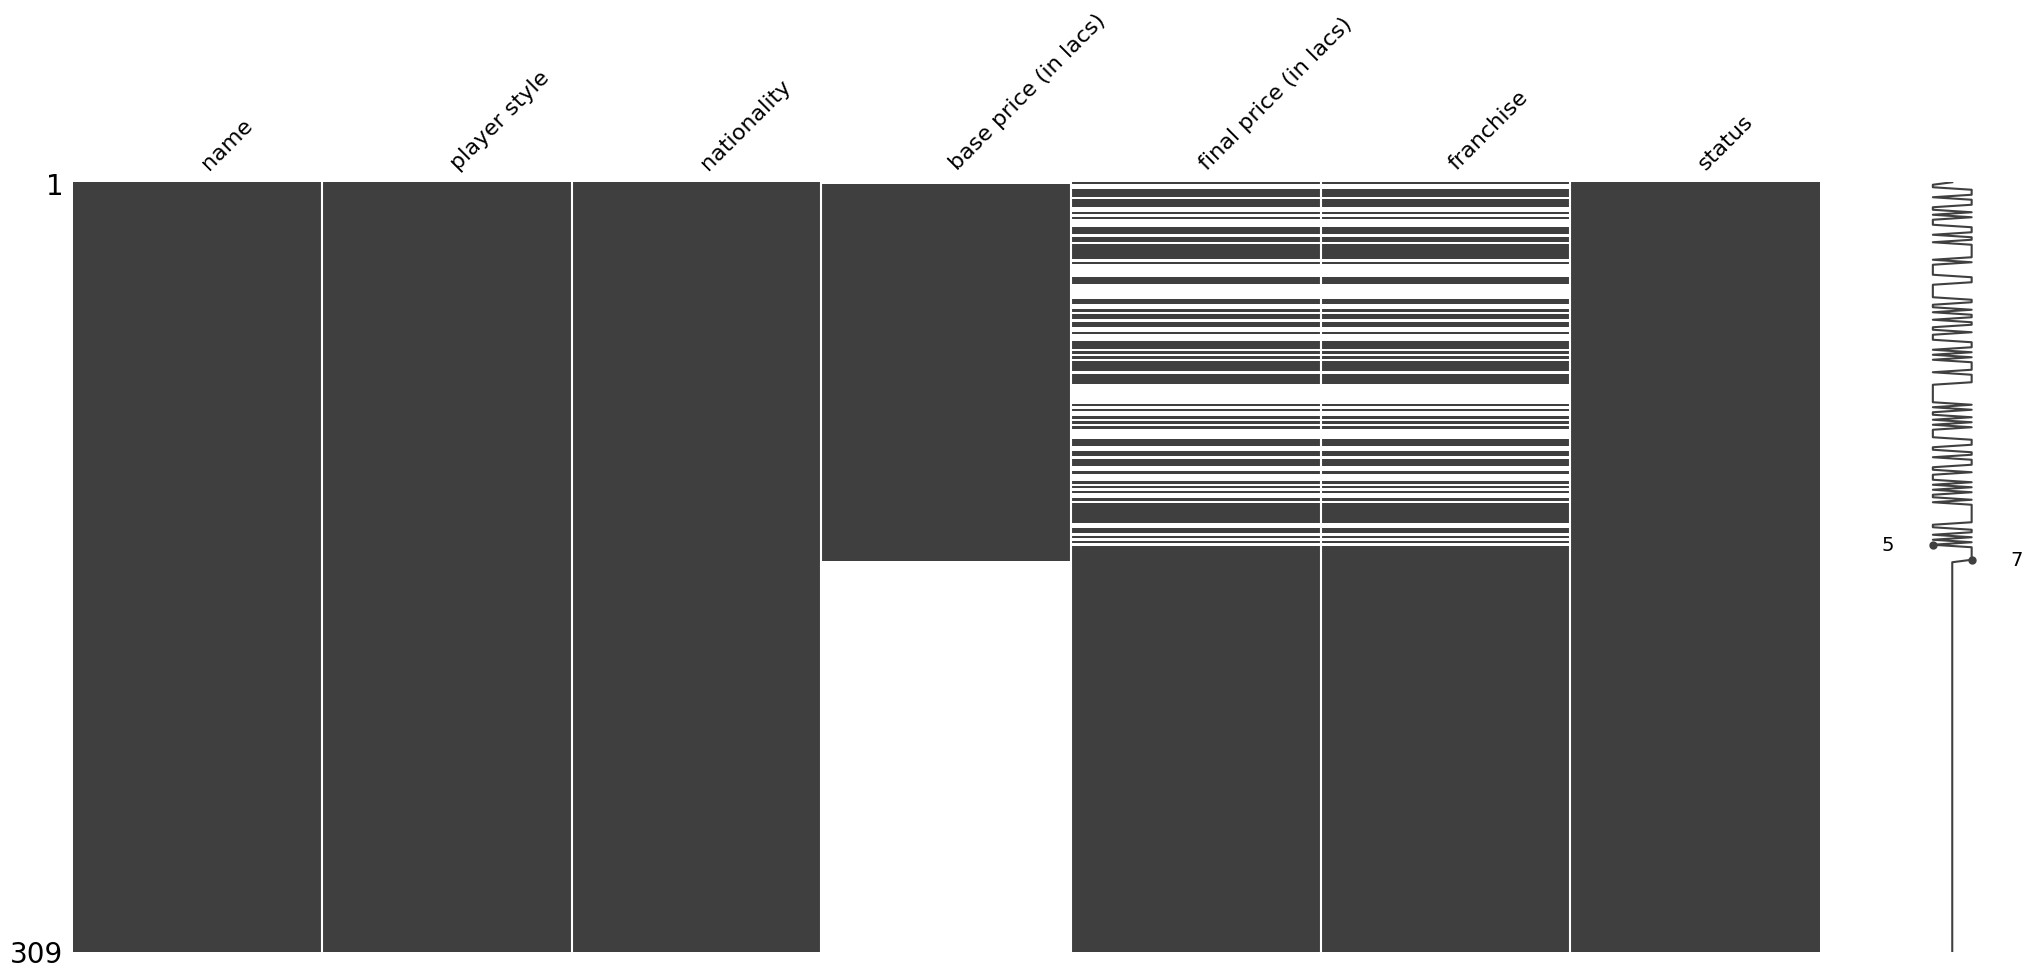

In [ ]:
msno.matrix(ipl_df)

In [ ]:
ipl_df.sample(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
169,Praveen Dubey,Bowler,India,NaN,50.0,DC,RETAINED
254,Krishnappa Gowtham,Allrounder,India,NaN,90.0,LSG,RETAINED
199,Rishi Dhawan,Allrounder,India,NaN,55.0,PBKS,RETAINED
85,Riley Meredith,Bowler,Australia,150.0,NaN,NaN,UNSOLD
189,Prabhsimran Singh,WK-Batter,India,NaN,60.0,PBKS,RETAINED
191,Mustafizur Rahman,Bowler,Bangladesh,NaN,200.0,DC,RETAINED
131,Mayank Agarwal,Batter,India,100.0,825.0,SRH,SOLD
269,David Warner,Batter,Australia,NaN,625.0,DC,RETAINED
35,Shubham Kapse,Bowler,India,20.0,NaN,NaN,UNSOLD
260,Aiden Markram,Batter,South Africa,NaN,260.0,SRH,RETAINED


In [ ]:
ipl_df[['base price (in lacs)','final price (in lacs)']]=ipl_df[['base price (in lacs)','final price (in lacs)']].fillna(0)

In [ ]:
ipl_df['franchise'] = ipl_df['franchise'].fillna('no')


In [ ]:
ipl_df.dtypes

name                      object
player style              object
nationality               object
base price (in lacs)     float64
final price (in lacs)    float64
franchise                 object
status                    object
dtype: object

<Axes: xlabel='nationality', ylabel='count'>

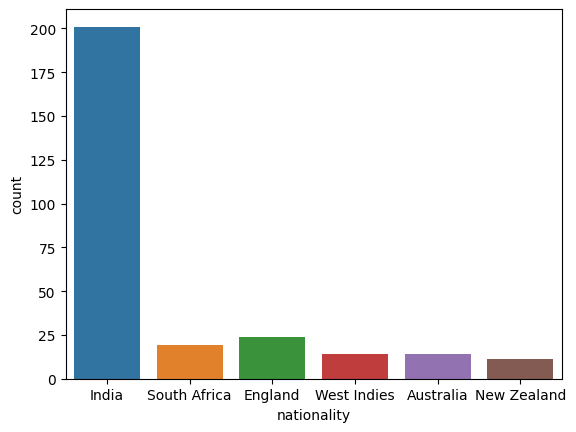

In [ ]:
# Plotting the count of players by nationality for the top 6 most frequent nationalities
top=ipl_df['nationality'].value_counts().nlargest(6).index.tolist()
filter=ipl_df[ipl_df['nationality'].isin(top)]
sns.countplot(x='nationality', data=filter)

In [ ]:
ipl_df['player style'] 


0          Bowler
1          Batter
2      Allrounder
3      Allrounder
4          Batter
          ...    
304     WK-Batter
305    Allrounder
306        Batter
307     WK-Batter
308    Allrounder
Name: player style, Length: 309, dtype: object

<Axes: xlabel='player style', ylabel='count'>

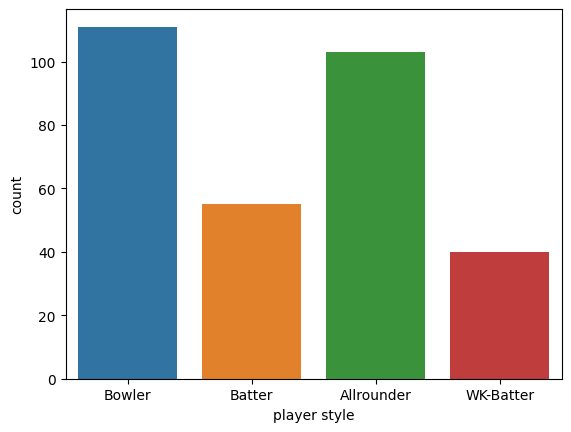

In [ ]:
sns.countplot(x='player style',data=ipl_df)

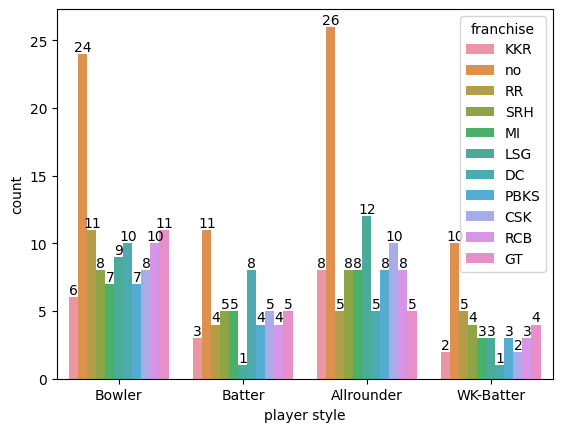

In [ ]:
plyer_style=sns.countplot(x='player style',data=ipl_df,hue='franchise')
for bars in plyer_style.containers:
     plyer_style.bar_label(bars)


<Axes: xlabel='nationality', ylabel='base price (in lacs)'>

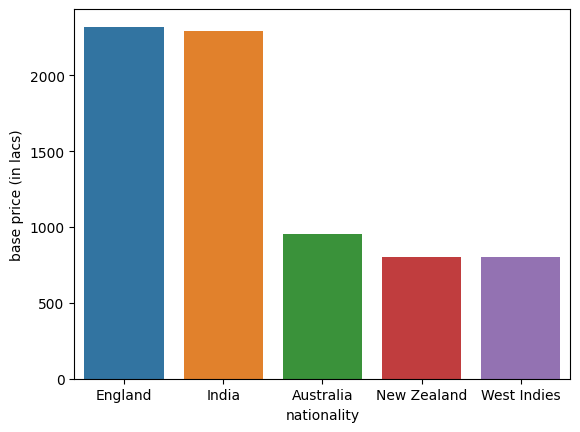

In [ ]:
# Grouping by nationality and summing up the base price
base=ipl_df.groupby(['nationality'], as_index=False)['base price (in lacs)'].sum().sort_values(by='base price (in lacs)',ascending=False).head()
sns.barplot(y='base price (in lacs)',x='nationality', data=base)

In [ ]:
# Plotting the count of players per franchise
sns.countplot(x='franchise', data=ipl_df)

NameError: name 'sns' is not defined

<Axes: xlabel='franchise', ylabel='base price (in lacs)'>

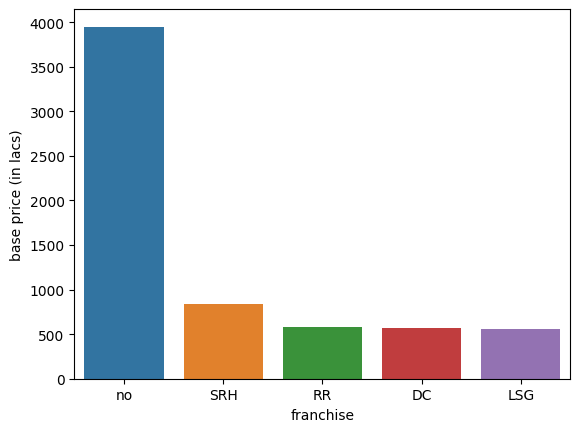

In [ ]:
# Grouping by franchise and summing up the base price
base=ipl_df.groupby(['franchise'], as_index=False)['base price (in lacs)'].sum().sort_values(by='base price (in lacs)',ascending=False).head()
sns.barplot(y='base price (in lacs)',x='franchise', data=base)

<Axes: xlabel='franchise', ylabel='final price (in lacs)'>

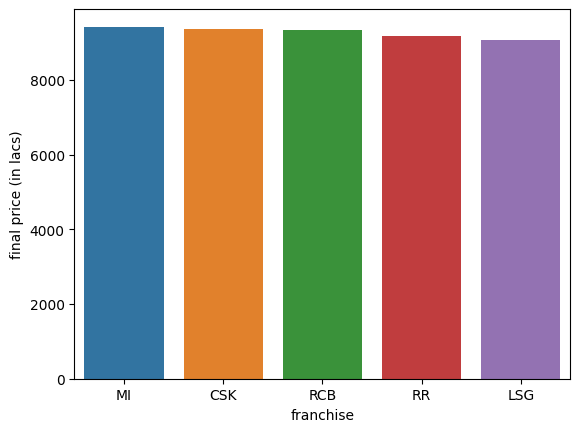

In [ ]:
# Grouping by franchise and summing up the final price
base=ipl_df.groupby(['franchise'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)',ascending=False).head()
sns.barplot(y='final price (in lacs)',x='franchise', data=base)


<Axes: xlabel='nationality', ylabel='final price (in lacs)'>

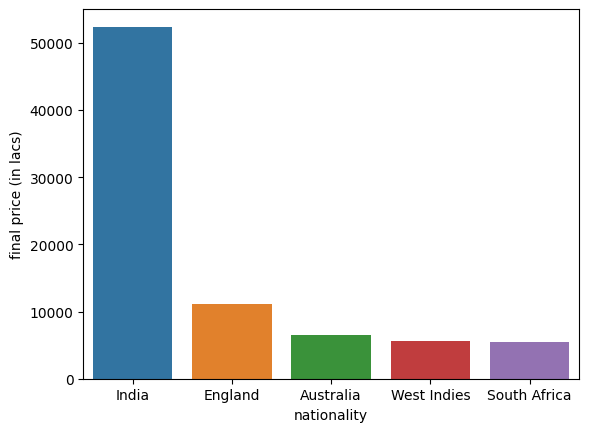

In [ ]:
# Grouping by nationality and summing up the final price
base=ipl_df.groupby(['nationality'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)',ascending=False).head()
sns.barplot(y='final price (in lacs)',x='nationality', data=base)

<Axes: xlabel='status', ylabel='count'>

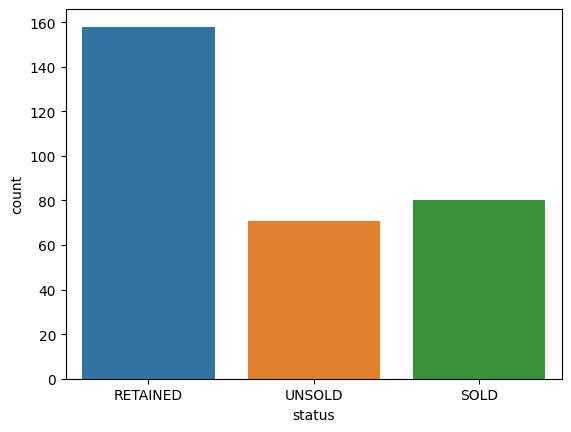

In [ ]:
sns.countplot(x='status',data=ipl_df)

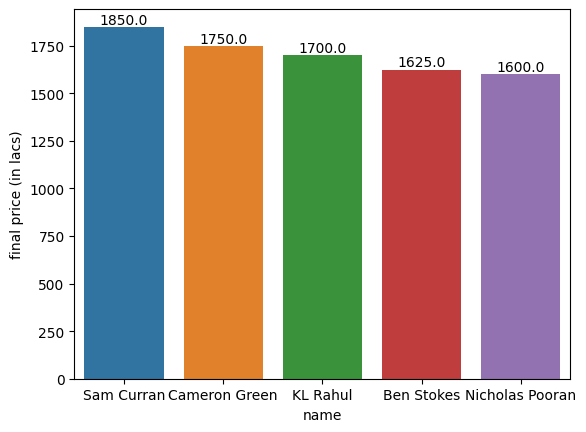

In [ ]:
name = ipl_df.groupby(['name'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)', ascending=False).head()
sns.barplot(x='name', y='final price (in lacs)', data=name)
for i, bar in enumerate(name['final price (in lacs)']):
    plt.text(i, bar, f'{bar}', ha='center', va='bottom')

<Axes: xlabel='player style', ylabel='final price (in lacs)'>

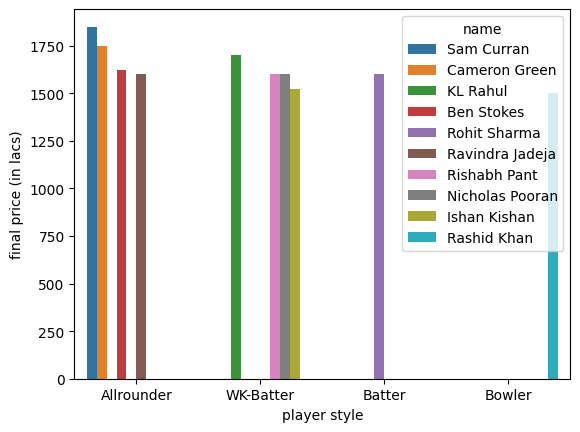

In [ ]:
name = ipl_df.groupby(['player style', 'name'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)',ascending=False).head(10)
sns.barplot(x='player style', y='final price (in lacs)', hue='name', data=name)

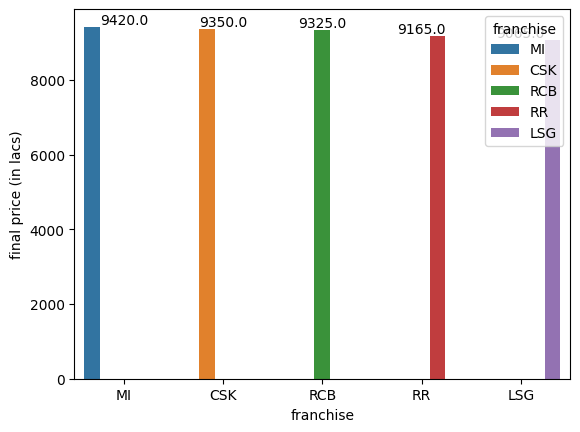

In [ ]:
team = ipl_df.groupby(['franchise'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)',ascending=False).head()
sns.barplot(x='franchise', y='final price (in lacs)', hue='franchise', data=team)
for i, bar in enumerate(team['final price (in lacs)']):
    plt.text(i, bar, f'{bar}', ha='center', va='bottom')

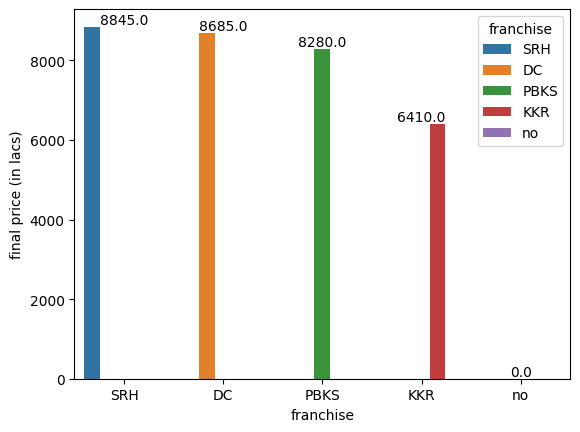

In [ ]:
team = ipl_df.groupby(['franchise'], as_index=False)['final price (in lacs)'].sum().sort_values(by='final price (in lacs)',ascending=False).tail()
sns.barplot(x='franchise', y='final price (in lacs)', hue='franchise', data=team)
for i, bar in enumerate(team['final price (in lacs)']):
    plt.text(i, bar, f'{bar}', ha='center', va='bottom')

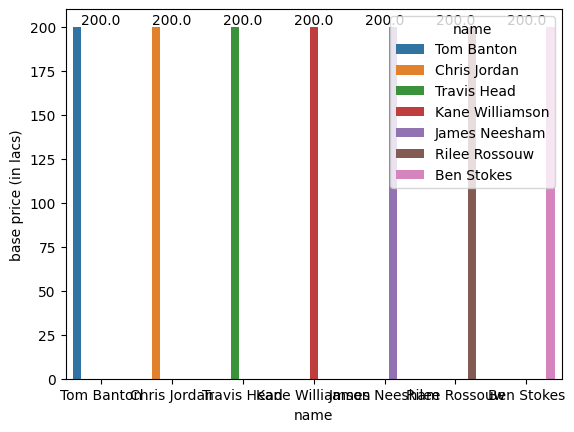

In [ ]:
base = ipl_df.groupby(['name',], as_index=False)['base price (in lacs)'].sum().sort_values(by='base price (in lacs)', ascending=False).head(7)
sns.barplot(x='name', y='base price (in lacs)', hue='name', data=base)
for i, bar in enumerate(base['base price (in lacs)']):
    plt.text(i, bar, f'{bar}', ha='center', va='bottom')

* Most Active Nationalities: Indians and English players have the highest
  participation in the actions within the dataset.
  
* Preferred Player Style: Bowlers and allrounders are the most prevalent
  player styles, indicating their importance in team compositions.
  
* Base Price Insights: English and Indian players command the highest base 
  prices, suggesting their perceived value in the auctions.
  
* Lowest Base Price Purchases: Teams like SRH (Sunrisers Hyderabad) and RR
  (Rajasthan Royals) tend to make purchases at lower base prices. 
  
* Top Final Price: Teams like MI (Mumbai Indians), CSK (Chennai Super Kings),
  and RCB (Royal Challengers Bangalore) make the highest final price   
  purchases.  
  
* Indian Dominance in Final Price: Indians tend to command the highest final
  prices, indicating their perceived value in the auctions. 
  
* Retired Players: It seems that retired players have a notable presence in 
  the dataset, possibly indicating their continued relevance or attractiveness 
  despite their retired status.  
  
* Most all-rounders: Lucknow Super Giants (LSG) have the most all-rounders, 
  with 12 players.
  
* Most bowlers: Rajasthan Royals (RR) and Gujarat Titans (GT) have the most  
  bowlers, each with 11 players.
  
* Most batters: Gujarat Titans (GT) have the most batters, with 8 players.

* Most wicketkeepers: Rajasthan Royals (RR) have the most wicketkeepers, with
  5 players.

* Lowest all-rounders: Rajasthan Royals (RR), Gujarat Titans (GT), and Chennai
  Super Kings (CSK) each have only 5 all-rounders.

* Lowest bowlers: Kolkata Knight Riders (KKR) have only 6 bowlers.

* Lowest batters: Lucknow Super Giants (LSG) have only 1 batter.

* Lowest wicketkeepers: Delhi Capitals (DC) have only 1 wicketkeeper. 

* Most valuable player: Sam Curran is identified as the most valuable player.

* Most Valuable Wicketkeeper: KL Rahul

* Most Valuable Batter: Rohit Sharma

* Most Valuable All-rounder: Sam Curran 

* Most Purchaser: Mumbai Indians (MI) are the franchise with the highest total 
  expenditure in player purchases.
  
* Lowest Purchaser: Kolkata Knight Riders (KKR) have the lowest total 
  expenditure in player purchases.
 

